Рассматривается следующая параметрическая модель: $X_1, ..., X_N$ — выборка из распределения $N(θ, 1)$. Известно, что $θ$ близко к нулю: с вероятностью не менее 0.95 выполнено неравенство |θ| < 0.5.

Сгенерируем выборку размера 100 из распределения Коши с нулевым параметром сдвига и с параметром масштаба, равным 1. При N = 100 используем эту выборку в качестве $X_1, . . . , X_N$ для описанной выше модели. Посчитаем байесовские оценки (для одного априорного распределения, учитывающего описанное выше свойство распределения параметра θ) и оценки максимального правдоподобия для всех $n \leq 100$. Построим графики абсолютной величины отклонения этих оценок от истинного значения параметра $θ_0 = 0$ в зависимости от n.

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
%matplotlib inline

В моделе $N(\theta,1)$, сопряженным распределением является $N(\frac{\sum X_i + \frac{a}{\sigma^2}}{n + \sigma^{-2}}, \frac{1}{n + \sigma^{-2}})$, где априорное распределение $N(a,\sigma^2)$ 
Нам нужно оценить параметры априорного распределения, учтя условие $P(|\theta| < 0.5) \geq 0.95$. Возьмем a = 0.
Воспользуемся правилом 2х сигм, знаем, что вероятность того что случайная величина лежит в интервале $P(x\in(-2\sigma,2\sigma)) = 0.9544$. Выразим $\sigma^2$.

In [8]:
sig_2 = (0.5 / 2) ** 2
print(sig_2)

0.0625


Возьмем это как параметр априорного распределения.(Это наше предположение о том, какой должна быть $\sigma^2$)

In [10]:
def bayesian_estimate_mean(a, sig_2):
    return (lambda X: (np.sum(X) + a / sig_2) / (len(X) + 1. / sig_2), 
            "bayes with apriori: N(" + str(a) + "," + str(sig_2) + ")")
def likehood_mean():
    return (lambda X: (np.average(X)), "maximal likehood")

In [21]:
def do_task(estimations, N=100, real_val=0):
    sample = stats.cauchy.rvs(size=N)
    x = np.arange(0,N,1)
    y = np.zeros(N)
    fig = plt.figure(figsize=(14,7))
    for estim, label in estimations:
        for n in range(N):
            y[n] = np.abs(estim(sample[:(n + 1)]) - real_val)
        plt.plot(x, y, label=label)
    plt.xlabel("n")
    plt.ylabel("difference")
    plt.legend(fontsize=10,loc=2)
    plt.show()

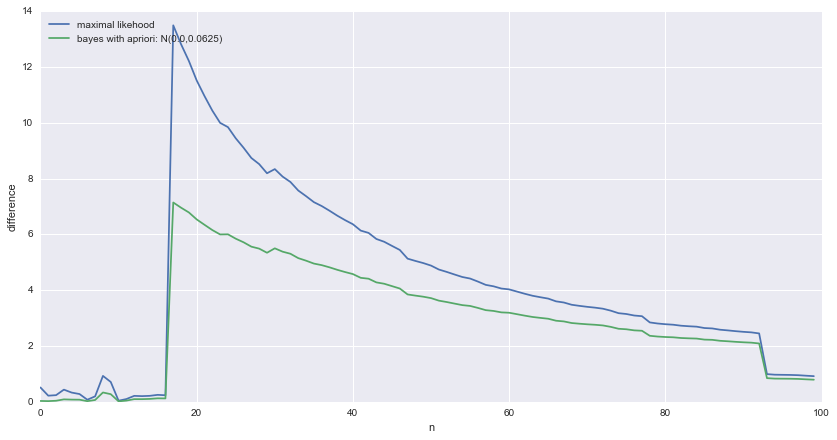

In [22]:
do_task(estimations=[
        likehood_mean(),
        bayesian_estimate_mean(0.,sig_2)
    ])

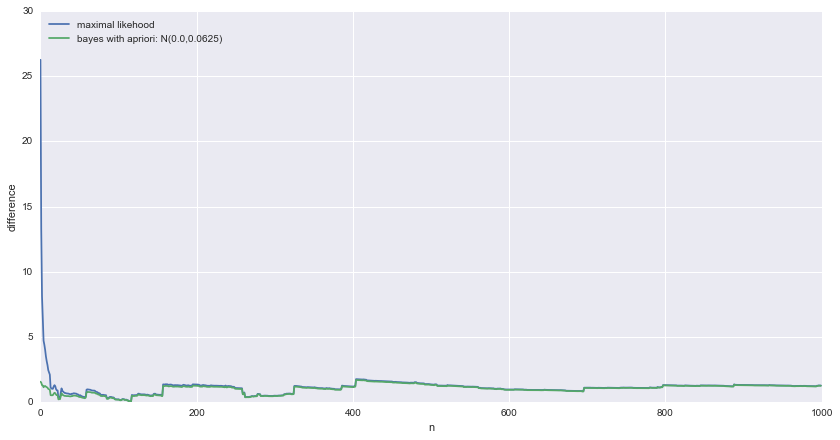

In [23]:
do_task(estimations=[
        likehood_mean(),
        bayesian_estimate_mean(0.,sig_2)
    ],N=1000)

Как видим, оценки максимального правдоподобия и байесовская едут себя одинакого, обе сильно смещены, от правильного ответа, это и не удивительно, потому, что мы оцениваем выборку из другого распределения, для наглядности построим графики распределений $N(0,1),Cauchy(0)$

In [26]:
x = np.arange(-10,10,0.005)

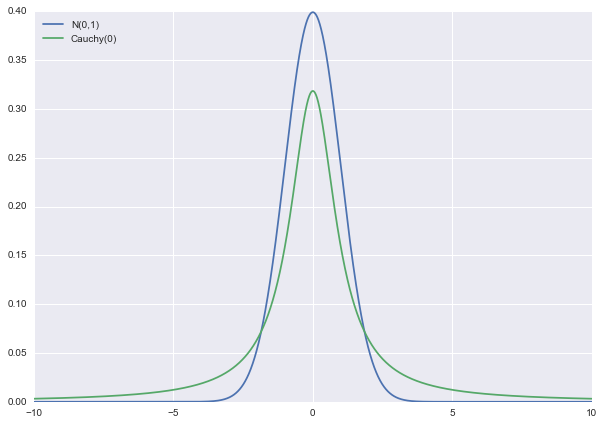

In [27]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,stats.norm.pdf(x), label="N(0,1)")
plt.plot(x,stats.cauchy.pdf(x), label="Cauchy(0)")
plt.legend(fontsize=10,loc=2)
plt.show()

Видно, что распределения похожи, но у нормального дисперсия(ширина графика) меньше.

### Вывод. Если неправильно взять априорное распределение(даже казалось бы совсем немного не угадать, как в нашем примере), то ответ может быть совсем неправильным и неожидаемым. Таким образом нужно всегда проверять свои предположение о виде априорного распределения. А оценка максимального правдоподобия ведет себя так же как байесовская, в нашем примере, и на маленькой выборке(до 20) элементов, они даже давали похожий на правду ответ.